# Notebook Details:

- Data Exploration of Raw Polls Data set
- Expanded on Modeling

## Imports

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_extraction import state_agg, imputed_600
from model_evaluator import evaluation

ImportError: cannot import name 'accuracy_score' from 'sklearn.base' (/Users/nikki/anaconda3/envs/geopandas/lib/python3.11/site-packages/sklearn/base.py)

In [2]:
plt.style.use('ggplot')

In [3]:
polls = pd.read_csv('../data/raw-polls-updated.csv')
polls.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,comment,state,state_agg,imputed_600,anon,registered_voters,averaged,org,person,rightcall
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,...,for New York Daily News | WABC-TV (New York),NY,NY,0,0,0,0,1,0,1.0
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,...,NaN,OH,OH,0,0,0,0,0,0,1.0
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,...,for unspecified Democratic sponsor,NV,NV,0,1,0,0,0,0,1.0
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,...,for New York Daily News | WABC-TV (New York),NY,NY,0,0,0,0,1,0,0.0
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,...,for Charles E. Schumer,NY,NY,0,0,0,0,0,1,1.0


In [4]:
#trying to figure out the difference between year and election date column - any differences? yes
#The reason is because GA runoff elections in 2020 spilled into January 2021
mismatched_rows = polls['electiondate'].str.split('/').apply(lambda x: x[2]).astype(int) == polls['year']
# Display the mismatched rows
mismatched_rows.value_counts()

True     10742
False       34
Name: count, dtype: int64

In [5]:
mismatched_rows = polls['electiondate'].str.split('/').apply(lambda x: x[2]).astype(int) != polls['year']

# Filter the DataFrame to show rows where the condition is False
mismatched_data = polls[mismatched_rows]

# Display the values where the condition is False
mismatched_data

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,comment,state,state_agg,imputed_600,anon,registered_voters,averaged,org,person,rightcall
10742,73801,138449,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,Emerson College,88,...,NaN,GA,GA,0,0,0,0,0,0,0.0
10743,73835,138504,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,Trafalgar Group,338,...,for unspecified Republican sponsor,GA,GA,0,1,0,0,0,0,0.0
10744,73801,138448,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,Emerson College,88,...,NaN,GA,GA,0,0,0,0,0,0,0.0
10745,73835,138503,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,Trafalgar Group,338,...,for unspecified Republican sponsor,GA,GA,0,1,0,0,0,0,0.0
10746,73888,138629,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,Reconnect Research/Probolsky Research,651,...,NaN,GA,GA,0,0,0,0,0,0,1.0
10747,73860,138541,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,SurveyUSA,325,...,for WXIA-TV,GA,GA,0,0,0,0,1,0,1.0
10748,73888,138628,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,Reconnect Research/Probolsky Research,651,...,NaN,GA,GA,0,0,0,0,0,0,0.0
10749,73860,138540,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,SurveyUSA,325,...,for WXIA-TV,GA,GA,0,0,0,0,1,0,1.0
10750,73955,138742,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,Mellman Group,205,...,for unspecified Democratic sponsor,GA,GA,0,1,0,0,0,0,1.0
10751,73955,138741,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,Mellman Group,205,...,for unspecified Democratic sponsor,GA,GA,0,1,0,0,0,0,1.0


In [6]:
polls.shape

(10776, 41)

In [7]:
polls.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,comment,state,state_agg,imputed_600,anon,registered_voters,averaged,org,person,rightcall
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,...,for New York Daily News | WABC-TV (New York),NY,NY,0,0,0,0,1,0,1.0
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,...,NaN,OH,OH,0,0,0,0,0,0,1.0
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,...,for unspecified Democratic sponsor,NV,NV,0,1,0,0,0,0,1.0
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,...,for New York Daily News | WABC-TV (New York),NY,NY,0,0,0,0,1,0,0.0
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,...,for Charles E. Schumer,NY,NY,0,0,0,0,0,1,1.0


In [8]:
#NEED CSV with spacy
# #Heat map exploring if being a ORG v Person is correlated with features like "rightcall" or "bias" - no strong correlations here 
# heatmap_data = polls[['bias', 'rightcall', 'error', 'org', 'person']]
# correlation_matrix = heatmap_data.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
# plt.title('Correlation Heatmap')
# plt.show();

In [9]:
#loading in our data set that has rating stats on pollsters
ratings = pd.read_csv('../data/pollster-ratings.csv')
ratings.head()

#matching up common poll rating id columns so I can merge
ratings.rename(columns={'Pollster Rating ID': 'pollster_rating_id'}, inplace=True)
ratings.head()

,Rank,Pollster,pollster_rating_id,Polls Analyzed,AAPOR/Roper,Banned by 538,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,...,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus-Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty
0,1,The New York Times/Siena College,448,95,yes,no,-1.192860,A+,1.006012,0.747368,...,4.043250,5.364792,-1.318429,-1.625523,-1.318372,94,1.243260,0.700506,3.575558,0.261188
1,2,Selzer & Co.,304,53,yes,no,-1.175911,A+,0.161120,0.811321,...,4.916848,5.959235,-1.039274,-1.622671,-1.000844,35,0.297645,-0.343495,5.288403,0.000000
2,3,Research & Polling Inc.,280,44,no,no,-0.965392,A+,-0.582568,0.886364,...,4.177286,5.548050,-1.367651,-1.938115,-1.183301,43,-0.956078,0.632896,4.642076,0.286276
3,4,SurveyUSA,325,856,no,no,-0.917320,A+,0.003251,0.891355,...,4.681671,5.642531,-0.957747,-1.094410,-1.043528,697,0.003447,-0.526230,4.969035,0.126963
4,5,Marquette University Law School,195,15,yes,no,-0.908215,A/B,0.237527,0.800000,...,2.846556,5.938505,-3.088836,-3.191347,-1.208475,11,0.751227,-0.199840,4.201278,0.257600


In [10]:
#merging our poll data with pollster rating data - enriching so we have information like grade of pollster, etc
merged_df = pd.merge(polls, ratings, on='pollster_rating_id', how='left')
merged_df.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus-Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,...,4.740100,5.234178,-0.490965,-2.175389,-0.421866,17.0,-3.425434,0.567141,4.544692,0.050743
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,...,4.199093,5.689016,-1.486810,-0.853513,-0.368557,30.0,-3.205671,-2.558033,3.438590,0.433143
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,...,8.428978,5.610426,2.821665,3.913602,1.008798,11.0,7.962182,6.893962,6.106365,0.000000
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,...,4.740100,5.234178,-0.490965,-2.175389,-0.421866,17.0,-3.425434,0.567141,4.544692,0.050743
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,...,5.391699,5.595187,-0.200375,-0.332816,-0.175144,33.0,3.537298,4.275848,5.201474,0.036066


In [11]:
#checking the shape to see if merged correctly
merged_df.shape

(10776, 61)

In [12]:
#checking the shape to see if merged correctly
polls.shape

(10776, 41)

In [13]:
#NEED CSV with spacy
#Scatter plot exploring if Bias changes over the years with color coordination on Org vs Person
# scatter_data = polls[['year', 'bias', 'person', 'org']]

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(scatter_data['year'], scatter_data['bias'], 
#                       c=scatter_data['person'].map({1: 'red', 0: 'green'}),
#                       alpha=0.5)

# # Adding a legend for the colors
# legend_labels = ['Person', 'Org']
# plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

# plt.title('Year vs. Bias')
# plt.xlabel('Year')
# plt.ylabel('Bias')
# plt.grid(True)
# plt.show();

In [14]:
#grouping type of race by mean bias and count of polls 
polls.groupby(['year', 'type_simple'])['bias'].agg(['mean', 'count'])

mean  count
year type_simple                 
1998 Gov-G       -5.794870    115
     House-G     -1.175439     57
     Sen-G       -4.204706    102
1999 Gov-G       -4.292500      4
2000 Gov-G       -0.364419     43
...                    ...    ...
2020 Gov-G        7.233421     38
     House-G      6.372800    100
     Pres-G       4.077831    590
     Pres-P            NaN      0
     Sen-G        4.836454    282

[68 rows x 2 columns]

In [15]:
#showing what races sorted largest to smallest ab value had the largest bias
result = polls.groupby(['year', 'type_simple'])['bias'].agg(['mean', 'count'])
result['mean_abs'] = result['mean'].abs()
result_sorted = result.sort_values(by='mean_abs', ascending=False)
# result_sorted = result_sorted.drop(columns=['mean_abs'])
result_sorted

mean  count   mean_abs
year type_simple                             
2015 House-G      22.950000      1  22.950000
2013 House-G      10.925000      4  10.925000
2020 Gov-G         7.233421     38   7.233421
     House-G       6.372800    100   6.372800
2019 House-G       6.182500      4   6.182500
...                     ...    ...        ...
2004 Pres-P             NaN      0        NaN
2008 Pres-P             NaN      0        NaN
2012 Pres-P             NaN      0        NaN
2016 Pres-P             NaN      0        NaN
2020 Pres-P             NaN      0        NaN

[68 rows x 3 columns]

In [16]:
#number of polls per race
value_counts_per_type = polls['type_simple'].value_counts()
value_counts_per_type

type_simple
Pres-G     2940
Sen-G      2651
Pres-P     1821
Gov-G      1712
House-G    1652
Name: count, dtype: int64

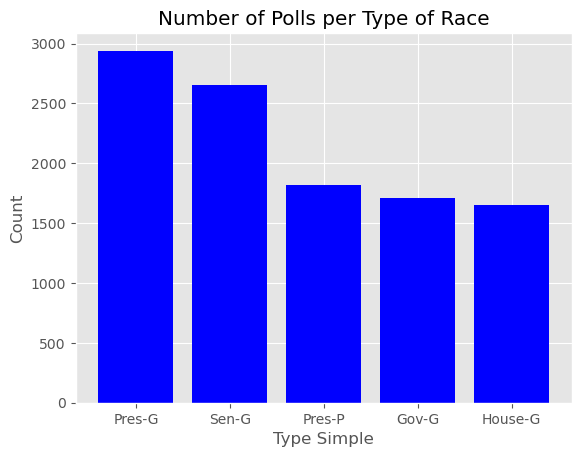

In [17]:
#Bar Chart of Number of Polls per Type of Race 
categories = ['Pres-G', 'Sen-G', 'Pres-P', 'Gov-G', 'House-G']
values = [2940, 2651, 1821, 1712, 1652]
mean_value = sum(values) / len(values)
plt.bar(categories, values, color='blue')
plt.title('Number of Polls per Type of Race')
plt.xlabel('Type Simple')
plt.ylabel('Count')

# Display the chart
plt.show();

#showing us that General Presidental pollings has the most number of polls followed by General Senate polling. Primary, Governor, and House polling has less polls, probably because less demand/readership of these races compared to Presidental and Senate races.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


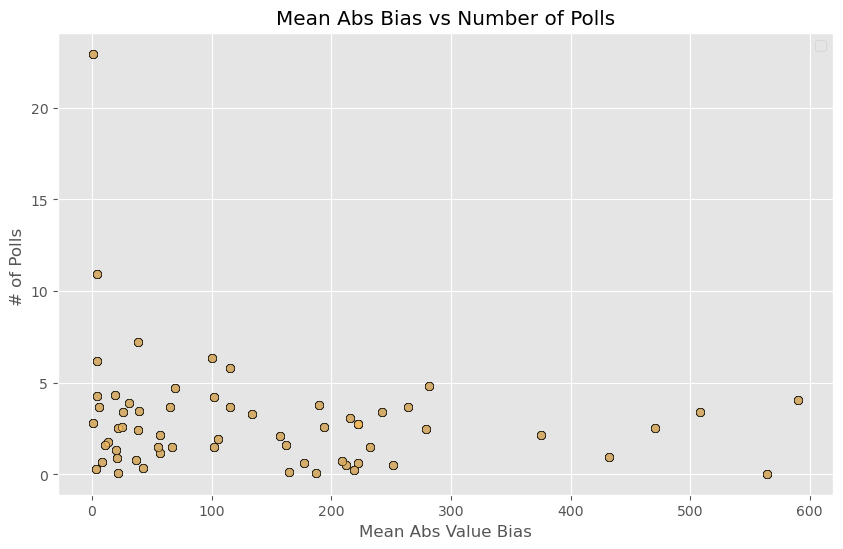

In [18]:
#exploring the relationship between Mean Abs Bias and count of polls - more bias with less number of polls completed? Looks like small downtrend .. may include a regression line here 
plt.figure(figsize=(10, 6))
for race, group in polls.groupby('type_simple'):
    plt.scatter(
        result['count'],
        result['mean_abs'],
        alpha=0.7,
        edgecolors='k')

# Add labels and title
plt.xlabel('Mean Abs Value Bias')
plt.ylabel('# of Polls ')
plt.title('Mean Abs Bias vs Number of Polls')
plt.legend()

# Show the plot
plt.grid(True)
plt.show();

In [19]:
#checking out how many pollsters were put into certain grade categories
ratings['538 Grade'].value_counts()[sorted(ratings['538 Grade'].unique())]

538 Grade
A        8
A+       4
A-       9
A/B     47
B       10
B+      11
B-       9
B/C    382
C        4
C+       2
C-       1
C/D     19
F       11
Name: count, dtype: int64

In [20]:
#we have too drop some NAs because not all polls had corresponding pollster rating data
merged_df_cleaned = merged_df.dropna(subset=['538 Grade'])

In [21]:
#creating this as a sorting function for chart
valuecountsbygrade = merged_df_cleaned['538 Grade'].value_counts()

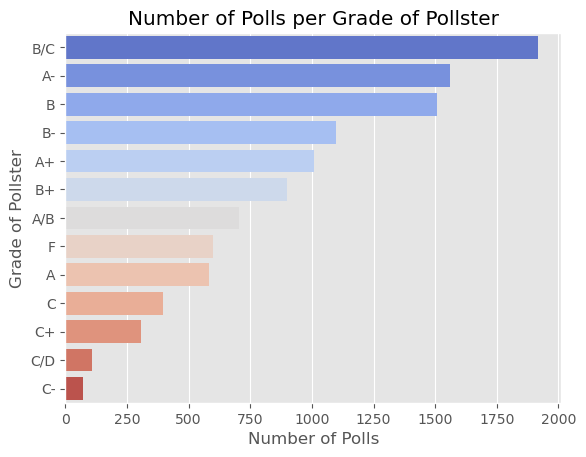

In [22]:
#exploring number of polls per grade of pollster 
sorted_grades = valuecountsbygrade.index
sns.barplot(x=merged_df_cleaned['538 Grade'].map(valuecountsbygrade), y=merged_df_cleaned['538 Grade'],order=sorted_grades, palette='coolwarm')

# Display the plot
plt.title('Number of Polls per Grade of Pollster')
plt.xlabel('Number of Polls')
plt.ylabel('Grade of Pollster')
plt.show();

In [23]:
#creating this as a sorting function for chart
sorted_grades2 = merged_df_cleaned['538 Grade'].value_counts()[['A+', 'A', 'A-', 'A/B', 'B+', 'B', 'B-', 'B/C', 'C+', 'C', 'C-', 'C/D', 'F']]

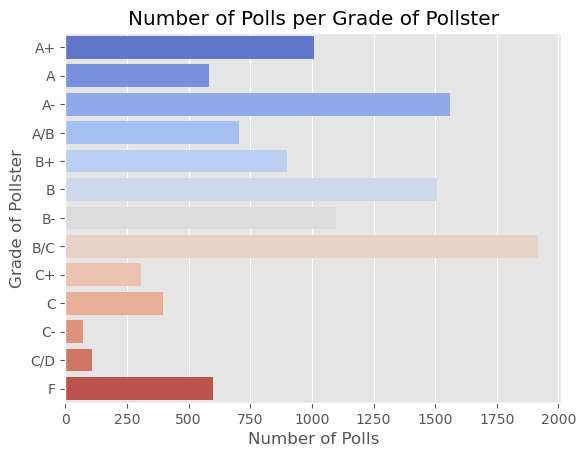

In [24]:
#exploring number of polls per grade of pollster  - sorted by grade vs number of polls
sorted_grades2 = sorted_grades2.index
sns.barplot(x=merged_df_cleaned['538 Grade'].map(valuecountsbygrade), y=merged_df_cleaned['538 Grade'], order=sorted_grades2, palette='coolwarm')

# Display the plot
plt.title('Number of Polls per Grade of Pollster')
plt.xlabel('Number of Polls')
plt.ylabel('Grade of Pollster')
plt.show();

In [25]:
#creating this as a sorting function for chart on grouping methodologies
valuecountsbymethod = merged_df_cleaned['methodology'].value_counts()

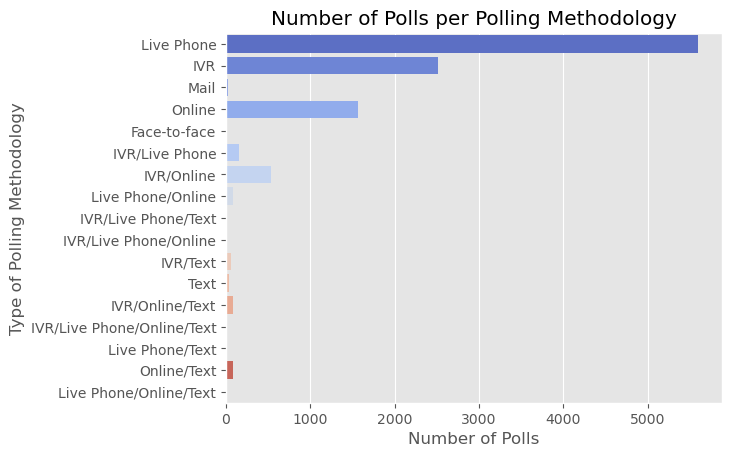

In [26]:
#making a bar chart that represents the most used methodologies of polling 
sns.barplot(x=merged_df_cleaned['methodology'].map(valuecountsbymethod), y=merged_df_cleaned['methodology'], palette='coolwarm')

# Display the plot on Number of Polls per Polling Methodology
plt.title('Number of Polls per Polling Methodology')
plt.xlabel('Number of Polls')
plt.ylabel('Type of Polling Methodology')
plt.show();

In [27]:
#cleaning these methods categories up with this function
def method_flagger(series):
    flags = {
            'Text' : [],
            'Live Phone' : [],
            'Mail' : [],
            'Face-to-Face' : [],
            'IVR' : [],
            'Online' : []
        }
    for text in series:
        methods = text.split('/')

        #possible = ['Text', 'Live Phone', 'Mail', 'Face-to-Face', 'IVR', 'Online']

        

        for option in flags.keys():
            if option in methods:
                flags[option].append(1)
            else:
                flags[option].append(0)
    return flags

In [28]:
# merged_df_cleaned['methodology'].head().apply(method_flagger)
newrowsofmethods = pd.DataFrame(method_flagger(merged_df_cleaned['methodology']))

In [29]:
merged_df_cleaned.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus-Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,...,4.740100,5.234178,-0.490965,-2.175389,-0.421866,17.0,-3.425434,0.567141,4.544692,0.050743
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,...,4.199093,5.689016,-1.486810,-0.853513,-0.368557,30.0,-3.205671,-2.558033,3.438590,0.433143
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,...,8.428978,5.610426,2.821665,3.913602,1.008798,11.0,7.962182,6.893962,6.106365,0.000000
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,...,4.740100,5.234178,-0.490965,-2.175389,-0.421866,17.0,-3.425434,0.567141,4.544692,0.050743
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,...,5.391699,5.595187,-0.200375,-0.332816,-0.175144,33.0,3.537298,4.275848,5.201474,0.036066


In [30]:
newrowsofmethods.tail()

,Text,Live Phone,Mail,Face-to-Face,IVR,Online
10750,1,0,0,0,1,1
10751,0,1,0,0,0,1
10752,0,1,0,0,0,0
10753,0,1,0,0,1,0
10754,1,0,0,0,1,1


In [31]:
merged_df_cleaned = pd.merge(merged_df_cleaned, newrowsofmethods, left_index=True, right_index=True)

In [32]:
merged_df_cleaned.tail()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty,Text,Live Phone,Mail,Face-to-Face,IVR,Online
10750,73955,138742,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,Mellman Group,205,...,4.178260,4.980172,4.315200,0.335004,1,0,0,0,1,1
10751,73955,138741,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,Mellman Group,205,...,4.178260,4.980172,4.315200,0.335004,0,1,0,0,0,1
10752,73886,138618,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,Opinion Savvy/InsiderAdvantage,243,...,0.256672,-0.811770,5.160935,0.000000,0,1,0,0,0,0
10753,73886,138617,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,Opinion Savvy/InsiderAdvantage,243,...,0.256672,-0.811770,5.160935,0.000000,0,1,0,0,1,0
10754,73898,138647,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,Open Model Project,629,...,-5.652378,-5.465625,5.266666,0.000000,1,0,0,0,1,1


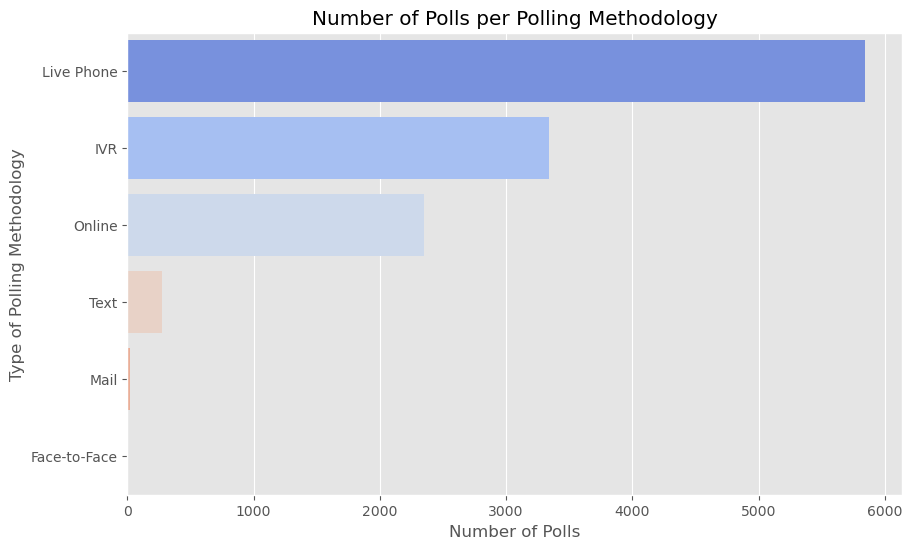

In [33]:
#re-creating a bar chart that represents the most used methodologies of polling with cleaned values
methods = merged_df_cleaned[['Text', 'Live Phone', 'Mail', 'Face-to-Face', 'IVR', 'Online']]
methods = methods.apply(pd.to_numeric, errors='coerce')
methods = methods.dropna()

# Calculate the counts for each method
method_counts = methods.sum()

method_counts = method_counts.sort_values(ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=method_counts.values, y=method_counts.index, palette='coolwarm')
# Display the plot on Number of Polls per Polling Methodology
plt.title('Number of Polls per Polling Methodology')
plt.xlabel('Number of Polls')
plt.ylabel('Type of Polling Methodology')
plt.show();

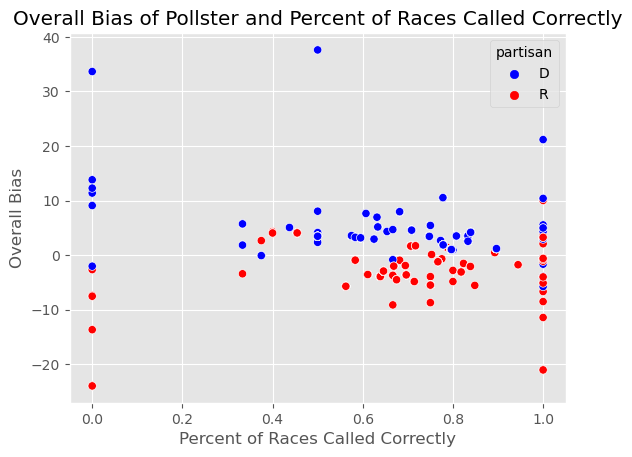

In [34]:
#Overall Bias of Pollster and Percent of Races Called Correctly
#This chart might be misleading since we are using the merged data set with the rating data 
#going to use the chart below that only looks at rating data instead but conveys the same message that partisan aligned polls will lean towards their party
partisan_palette = {'D': 'blue', 'R': 'red'}
default_color = 'grey'

sns.scatterplot(
    data = merged_df_cleaned,
    x = 'Races Called Correctly',
    y = 'Bias',
    palette=partisan_palette,
    hue='partisan',
    hue_order=['D', 'R'],
    edgecolor='w',
    legend='full'
)

plt.title('Overall Bias of Pollster and Percent of Races Called Correctly')
plt.xlabel('Percent of Races Called Correctly')
plt.ylabel('Overall Bias')
plt.show();

In [35]:
merged_df_cleaned['partisan'].value_counts()

partisan
D      451
R      361
IND      1
Name: count, dtype: int64

In [36]:
#we are filling in blanks as NPL - for no party listed
merged_df_cleaned['partisan'].fillna('NPL', inplace=True)

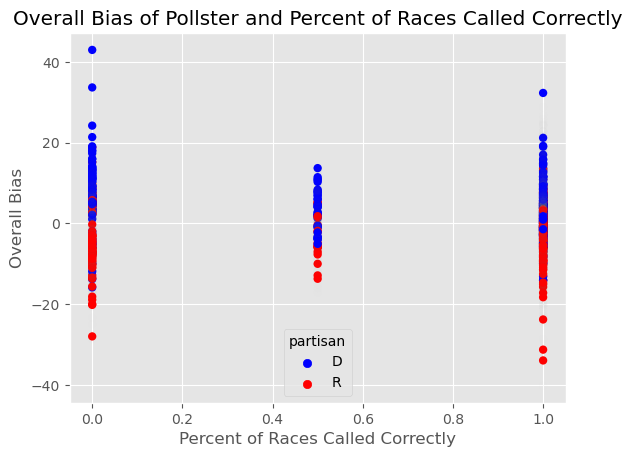

In [37]:
#change to dual bix plot with red and blue
partisan_palette = {'D': 'blue', 'R': 'red', 'NPL': (0.6, 0.6, 0.6, 0.01), 'IND': (0.6, 0.6, 0.6, 0.01)}  # 0.5 is the alpha value for transparency and the three other numbers are R,B,G

sns.scatterplot(
    data = merged_df_cleaned,
    x = 'rightcall',
    y = 'bias',
    palette=partisan_palette,
    hue='partisan',
    hue_order=['D', 'R'],
    edgecolor='none',
    legend='full'
)

plt.title('Overall Bias of Pollster and Percent of Races Called Correctly')
plt.xlabel('Percent of Races Called Correctly')
plt.ylabel('Overall Bias')
plt.show();

In [38]:
# create a new column 'rightcall_string' to work better with some graphs
merged_df_cleaned['rightcall_string'] = merged_df_cleaned['rightcall'].astype(str)

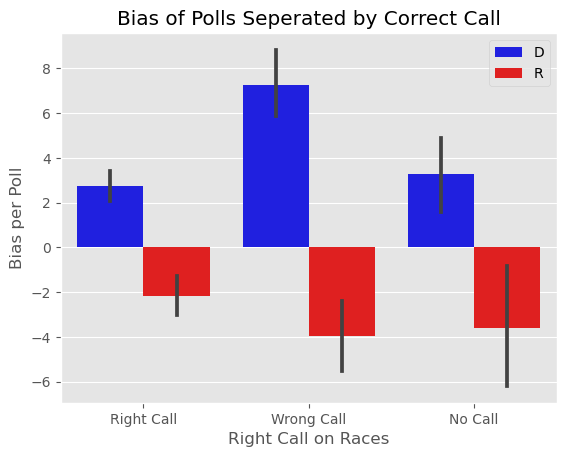

In [39]:
partisan_palette = {'D': 'blue', 'R': 'red','NPL': (0.6, 0.6, 0.6, 0.01), 'IND': (0.6, 0.6, 0.6, 0.01)}

# Create a bar plot
sns.barplot(
    data=merged_df_cleaned,
    x='rightcall_string',
    y='bias',
    palette=partisan_palette,
    hue='partisan',
    hue_order=['D', 'R'],
    edgecolor='none'
)

# Set the title and labels
plt.xticks(ticks = [0,1,2], labels = ['Right Call', 'Wrong Call', 'No Call'])
plt.title('Bias of Polls Seperated by Correct Call')
plt.xlabel('Right Call on Races')
plt.ylabel('Bias per Poll')

# Show the legend
plt.legend(loc='upper right')

# Show the plot
plt.show();

In [40]:
#number of polls in with partisan labels
merged_df_cleaned['partisan'].value_counts()

partisan
NPL    9921
D       451
R       361
IND       1
Name: count, dtype: int64

In [41]:
#Number of right calls made
merged_df_cleaned['rightcall'].value_counts()

rightcall
1.0    8413
0.0    1923
0.5     398
Name: count, dtype: int64

In [42]:
#group by 'partisan' and 'rightcall' columns and count the occurrences so we can have context of the data in the above chart
count_table = merged_df_cleaned.groupby(['partisan', 'rightcall_string']).size().unstack(fill_value=0)

# dropping the independent (only 1 and No party label categories)
newrowsofmethodologies = pd.DataFrame(count_table)
newrowsofmethodologies = newrowsofmethodologies.drop(["IND", "NPL"])
newrowsofmethodologies

rightcall_string,0.0,0.5,1.0
partisan,,,
D,121,36,294
R,98,19,244


In [43]:
#Researching into methodology - using Living Phone grouped by party
filteredonphone = merged_df_cleaned[merged_df_cleaned['Live Phone'] == 1]
filteredonphone['partisan'].value_counts()

partisan
NPL    5381
D       259
R       206
Name: count, dtype: int64

In [44]:
#Researching into methodology - using Online means grouped by party
filteredonOnline = merged_df_cleaned[merged_df_cleaned['Online'] == 1]
filteredonOnline['partisan'].value_counts()

partisan
NPL    2176
D       100
R        74
Name: count, dtype: int64

In [45]:
#Researching into methodology - using Living Phone grouped election type
filteredonphone['type_simple'].value_counts()

type_simple
Pres-G     1501
Sen-G      1327
Pres-P     1048
House-G    1036
Gov-G       934
Name: count, dtype: int64

In [46]:
#Researching into methodology - using Online means grouped election type
filteredonOnline['type_simple'].value_counts()

type_simple
Pres-G     825
Sen-G      691
Gov-G      322
Pres-P     258
House-G    254
Name: count, dtype: int64

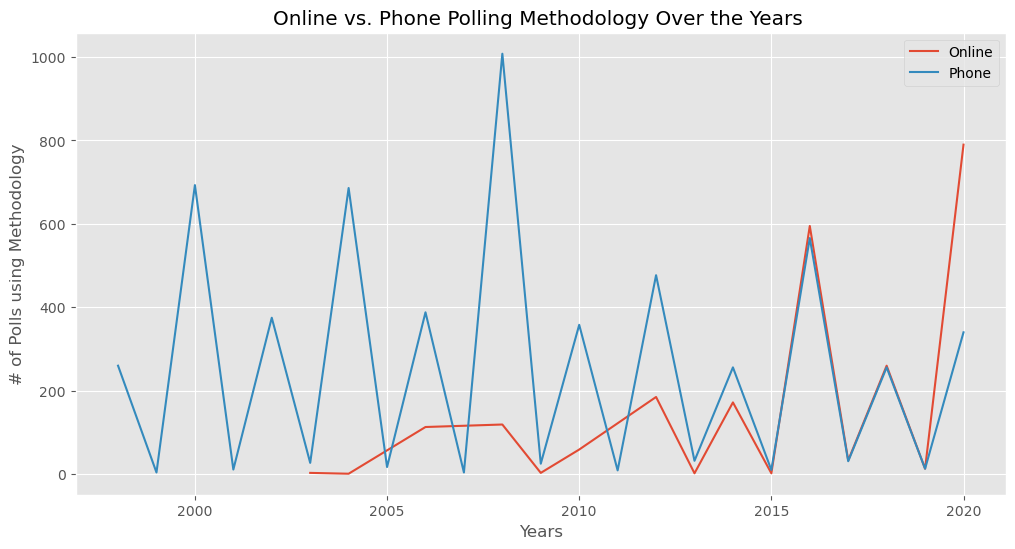

In [47]:
#we concluded the above might be less intersting than overall use of Phone vs Online OVER TIME
#we created a chaart that looks at Phone v Online methodology over time - expecting to see Phone decrease and Online increase
plotonlineandphone = merged_df_cleaned.groupby('year')[['Live Phone', 'Online']].count()

phone = merged_df_cleaned[merged_df_cleaned['Live Phone'] == 1].groupby('year')[['Live Phone']].count()
online = merged_df_cleaned[merged_df_cleaned['Online'] == 1].groupby('year')[['Online']].count()

fig, ax = plt.subplots(figsize = (12, 6))
ax1 = sns.lineplot(online["Online"], ax=ax, label="Online")
ax2 = sns.lineplot(phone["Live Phone"], ax=ax, label="Phone")
ax.legend();
plt.title('Online vs. Phone Polling Methodology Over the Years ')
plt.xlabel('Years')
plt.ylabel('# of Polls using Methodology')
plt.show();

For the chart above studying Phone vs. Online methodology used over time. We expected to see Online methodologies increase over the years and phone methodologies to decrease (Live Phone). However it looks like pollsters continued to use Live Phone calls along with Online methodologies after around 2015, as we see the trends pair closely together. We did expect to see an increase in Online methodology use and we did see that reflected in the chart. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


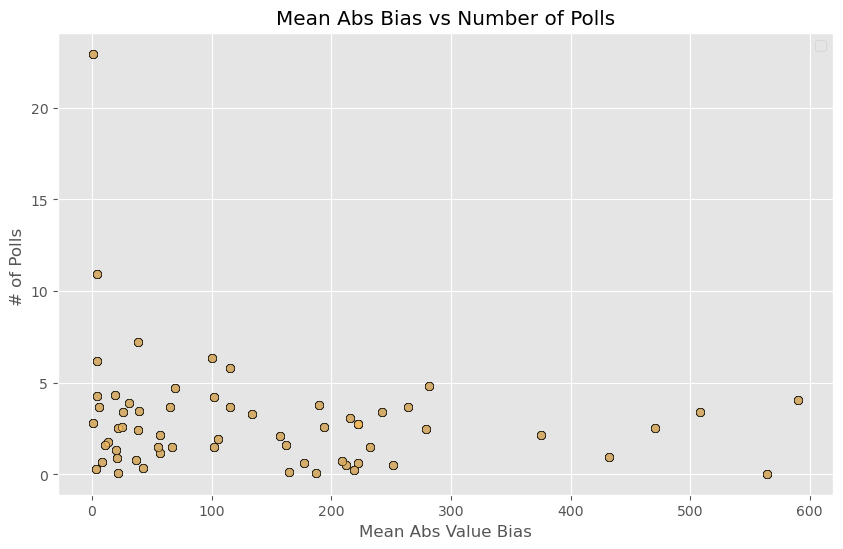

In [48]:
#exploring the relationship between Mean Abs Bias and count of polls - more bias with less number of polls completed? Looks like small downtrend .. may include a regression line here 
plt.figure(figsize=(10, 6))
for race, group in polls.groupby('type_simple'):
    plt.scatter(
        result['count'],
        result['mean_abs'],
        alpha=0.7,
        edgecolors='k')

# Add labels and title
plt.xlabel('Mean Abs Value Bias')
plt.ylabel('# of Polls ')
plt.title('Mean Abs Bias vs Number of Polls')
plt.legend()

# Show the plot
plt.grid(True)
plt.show();

# Modeling - Predictions 

In [49]:
#Imports of Modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [50]:
polls.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,comment,state,state_agg,imputed_600,anon,registered_voters,averaged,org,person,rightcall
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,...,for New York Daily News | WABC-TV (New York),NY,NY,0,0,0,0,1,0,1.0
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,...,NaN,OH,OH,0,0,0,0,0,0,1.0
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,...,for unspecified Democratic sponsor,NV,NV,0,1,0,0,0,0,1.0
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,...,for New York Daily News | WABC-TV (New York),NY,NY,0,0,0,0,1,0,0.0
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,...,for Charles E. Schumer,NY,NY,0,0,0,0,0,1,1.0


In [51]:
polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   poll_id             10776 non-null  int64  
 1   question_id         10776 non-null  int64  
 2   race_id             10776 non-null  int64  
 3   year                10776 non-null  int64  
 4   race                10776 non-null  object 
 5   location            10776 non-null  object 
 6   type_simple         10776 non-null  object 
 7   type_detail         10776 non-null  object 
 8   pollster            10776 non-null  object 
 9   pollster_rating_id  10776 non-null  int64  
 10  methodology         10776 non-null  object 
 11  partisan            819 non-null    object 
 12  polldate            10776 non-null  object 
 13  samplesize          10776 non-null  float64
 14  cand1_name          10776 non-null  object 
 15  cand1_id            10776 non-null  int64  
 16  cand

In [52]:
#adding in methodololgy extract / cleaning to polls
polls2 = pd.merge(polls, newrowsofmethods, left_index=True, right_index=True)

In [53]:
polls.shape

(10776, 41)

In [54]:
#dropped some rows without a method listed
polls2.shape

(10755, 47)

In [55]:
polls2.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,averaged,org,person,rightcall,Text,Live Phone,Mail,Face-to-Face,IVR,Online
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,...,0,1,0,1.0,0,1,0,0,0,0
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,...,0,0,0,1.0,0,1,0,0,0,0
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,...,0,0,0,1.0,0,1,0,0,0,0
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,...,0,1,0,0.0,0,1,0,0,0,0
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,...,0,0,1,1.0,0,1,0,0,0,0


In [56]:
polls2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10755 entries, 0 to 10754
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   poll_id             10755 non-null  int64  
 1   question_id         10755 non-null  int64  
 2   race_id             10755 non-null  int64  
 3   year                10755 non-null  int64  
 4   race                10755 non-null  object 
 5   location            10755 non-null  object 
 6   type_simple         10755 non-null  object 
 7   type_detail         10755 non-null  object 
 8   pollster            10755 non-null  object 
 9   pollster_rating_id  10755 non-null  int64  
 10  methodology         10755 non-null  object 
 11  partisan            813 non-null    object 
 12  polldate            10755 non-null  object 
 13  samplesize          10755 non-null  float64
 14  cand1_name          10755 non-null  object 
 15  cand1_id            10755 non-null  int64  
 16  cand1_par

In [57]:
polls2.isna().sum()

poll_id                  0
question_id              0
race_id                  0
year                     0
race                     0
location                 0
type_simple              0
type_detail              0
pollster                 0
pollster_rating_id       0
methodology              0
partisan              9942
polldate                 0
samplesize               0
cand1_name               0
cand1_id                 0
cand1_party              0
cand1_pct                0
cand2_name               0
cand2_id                 0
cand2_party              0
cand2_pct                0
cand3_pct             6858
margin_poll              0
electiondate             0
cand1_actual             0
cand2_actual             0
margin_actual            0
error                    0
bias                  1952
advancedplusminus        0
comment               6699
state                    0
state_agg                0
imputed_600              0
anon                     0
registered_voters        0
a

In [58]:
polls2['partisan'].value_counts()

partisan
D      451
R      361
IND      1
Name: count, dtype: int64

In [59]:
#entering in No Party Label for blanks in partisan
#only a single value for IND so putting it as NPL
polls2['partisan'] = [np.nan if value == 'IND' else value for value in polls2['partisan']]
polls2['partisan'].fillna('NPL', inplace=True)

In [60]:
#checking my counts 
polls2['partisan'].value_counts()

partisan
NPL    9943
D       451
R       361
Name: count, dtype: int64

In [61]:
#calc a feature that is # of days between polling date and election date
polls2['polldate'] = pd.to_datetime(polls2['polldate'])
polls2['electiondate'] = pd.to_datetime(polls2['electiondate'])
polls2['days_bt_polldate_election'] = (polls2['electiondate'] - polls2['polldate']).dt.days

In [62]:
polls2['days_bt_polldate_election'].unique()

array([21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,
        4,  3,  2,  1])

In [63]:
polls2['polldate'].head()

0   1998-10-13
1   1998-10-13
2   1998-10-13
3   1998-10-13
4   1998-10-13
Name: polldate, dtype: datetime64[ns]

In [64]:
#bias has NA so calculating the difference - confirms that this is the same # of error - error the abs value of bias
polls2['calc_bias'] = polls2['margin_poll'] - polls2['margin_actual']

In [65]:
polls2['rightcall'].value_counts(normalize=True)

rightcall
1.0    0.783821
0.0    0.179079
0.5    0.037099
Name: proportion, dtype: float64

In [66]:
#Choosing variables 
#leaving out "type_simple", "pollster", "partisan" but can oneHotencodelater  
X = polls2[['year', 'days_bt_polldate_election', 'samplesize', 'cand1_pct', 'cand2_pct',  
             'calc_bias']]
y = polls2['rightcall'].map({1:1, 0:0, 0.5:0})
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, train_size = 0.8)

In [67]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [68]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [69]:
print(f"Training R2: {lg.score(X_train, y_train)}")
print(f"Testing R2: {lg.score(X_test, y_test)}")
print(f"Cross val R2: {cross_val_score(lg, X_train, y_train).mean()}")

Training R2: 0.7806834030683403
Testing R2: 0.7926545792654579
Cross val R2: 0.780915841249679


In [70]:
preds = lg.predict(X_test)

In [71]:
y.value_counts(normalize=True)

rightcall
1    0.783821
0    0.216179
Name: proportion, dtype: float64

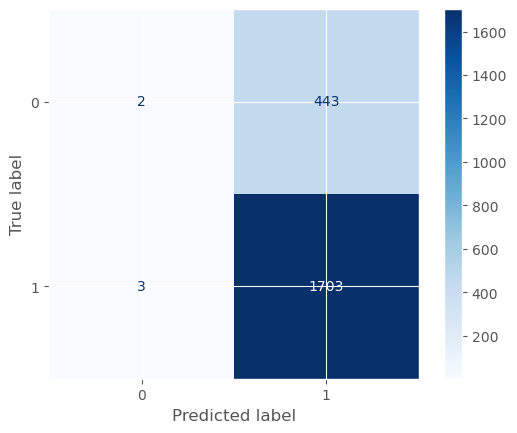

In [73]:
#making a confusion matrix
cm = confusion_matrix(y_test, preds)
displaycm = ConfusionMatrixDisplay(confusion_matrix=cm)
displaycm.plot(cmap='Blues', values_format='d');

### Adding in Categorical variables into our model

In [110]:
#Choosing variables
#X = polls2_en[['year', 'days_bt_polldate_election', 'samplesize', 'cand1_pct', 'cand2_pct',  
            #  'calc_bias', 'imputed_600', 'anon', 'registered_voters', 'averaged', 'org', 'person',
            # 'Text', 'Live Phone', 'Mail', "Face-to-Face", 'IVR', 'Online']]
#encoded "type_simple", "pollster", "partisan" but can oneHotencodelater 

#using margin_poll, margin_actual, and 'bias'  

columns_to_drop = ['poll_id', 'question_id', 'race_id', 'race', 'location', 'type_detail', 'pollster_rating_id', 'methodology', 'polldate', 'cand1_name',
                   'cand1_id', 'cand1_party', 'cand1_pct', 'cand2_name', 'cand2_id', 'cand2_party', 'cand2_pct', 
                   'cand3_pct', 'margin_poll', 'electiondate', 'cand1_actual', 'cand2_actual', 'margin_actual',
                   'error', 'bias', 'rightcall', 'pollster', 'state', 'state_agg', 'comment']

X = polls2.drop(columns=columns_to_drop)
y = polls2['rightcall'].map({1:1, 0:0, 0.5:0})

In [111]:
X.head()

,year,type_simple,partisan,samplesize,advancedplusminus,imputed_600,anon,registered_voters,averaged,org,person,Text,Live Phone,Mail,Face-to-Face,IVR,Online,days_bt_polldate_election,calc_bias
0,1998,Gov-G,NPL,364.0,1.461561,0,0,0,0,1,0,0,1,0,0,0,0,21,-9.85
1,1998,Gov-G,NPL,540.0,4.285789,0,0,0,0,0,0,0,1,0,0,0,0,21,-9.64
2,1998,Sen-G,D,488.0,-1.023784,0,1,0,0,0,0,0,1,0,0,0,0,21,4.91
3,1998,Sen-G,NPL,364.0,10.064104,0,0,0,0,1,0,0,1,0,0,0,0,21,-18.54
4,1998,Sen-G,D,902.0,-1.972391,0,0,0,0,0,1,0,1,0,0,0,0,21,-6.54


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, train_size = 0.8)

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [113]:
partisaner = Pipeline(
    [
        ('ohe', OneHotEncoder(drop = 'first'))
    ]
)

lg_pipe = Pipeline(
    [
        ('ct', ColumnTransformer(
            [
                ('patrisan_ct', partisaner, ['partisan', 'type_simple'])
            ],
            remainder = 'passthrough'
            )
        ),
        ('ss', StandardScaler()),
        ('logr', LogisticRegression())
    ]
)

In [114]:
lg_pipe.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('patrisan_ct',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['partisan',
                                                   'type_simple'])])),
                ('ss', StandardScaler()), ('logr', LogisticRegression())])

In [116]:
print(f"Training R2: {lg_pipe.score(X_train, y_train)}")
print(f"Testing R2: {lg_pipe.score(X_test, y_test)}")
print(f"Cross val R2: {cross_val_score(lg_pipe, X_train, y_train).mean()}")

Training R2: 0.7782426778242678
Testing R2: 0.7921896792189679
Cross val R2: 0.7784757374701027


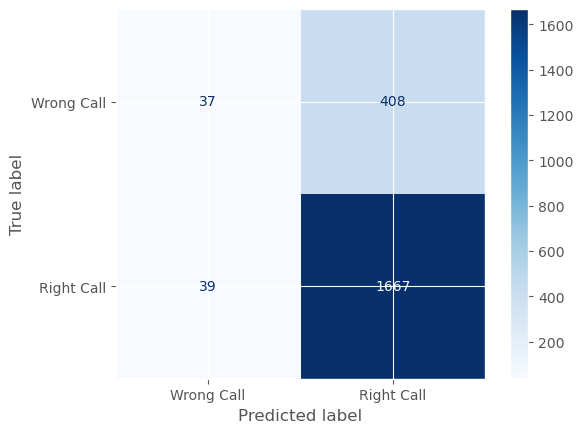

In [119]:
#making a confusion matrix
ConfusionMatrixDisplay.from_estimator(lg_pipe, 
                                          X_test, 
                                          y_test, 
                                          cmap='Blues', 
                                          display_labels = ['Wrong Call', 'Right Call']);